**Chutes Analyisis**

We will simulate the game snakes and ladders with 1, 2, 4 and 8 players 100 times, and display the results as histograms.

First we define the game, how to play several and a fixed seed version.

In [1]:
def single_game(num_players):
    """
        Returns duration of single game.

        Arguments
        ---------
        num_players : int
            Number of players in the game

        Returns
        -------
        num_moves : int
            Number of moves the winning player needed to reach the goal
        """
    import random
    ladders = {1: 39, 8: 2, 36: 16, 43: 19, 49: 30, 65: 17, 68: 14}
    snakes = {24: -19, 33: -30, 42: -12, 56: -19, 64: -37, 74: -62, 87: -17}
    throws_all_players = []
    for _ in range(num_players):
        throws = 0
        place = 0
        while place < 90:
            place += random.randint(1, 6)
            if place in ladders:
                place += ladders[place]
            elif place in snakes:
                place += snakes[place]
            throws += 1
        throws_all_players.append(throws)

    return min(throws_all_players)


def multiple_games(num_games, num_players):
    """
    Returns durations of a number of games.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """

    games = range(num_games)
    moves = []

    for _ in games:
        moves.append(single_game(num_players))

    return moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """

    import random

    random.seed(seed)

    return multiple_games(num_games, num_players)

We then specify our arguments and run the simulation to get some histograms.

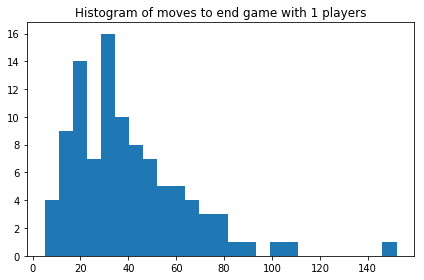

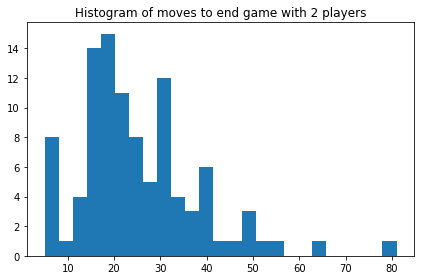

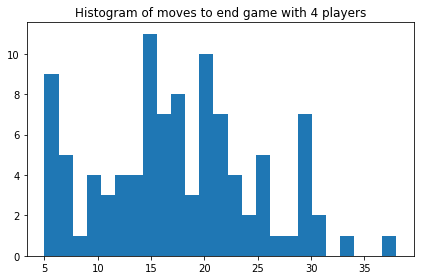

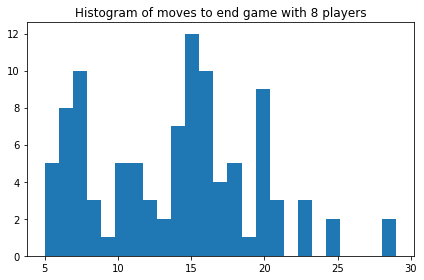

In [3]:
import matplotlib.pyplot as plt

num_games = 100
nums_players = [1, 2, 4, 8]
seed = 1248

for num_players in nums_players:
    moves = multi_game_experiment(num_games, num_players, seed)
    plt.hist(moves, bins=25)
    plt.title("Histogram of moves to end game with " + str(num_players) + " players")
    plt.tight_layout()
    plt.show()